<a href="https://colab.research.google.com/github/RakshayGO/basic-ML-models/blob/main/MNIST_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# data from keras, building dataset and displaying it

In [ ]:
%tensorflow_version 2.x 

import tensorflow as tf
from tensorflow import keras
from IPython.display import clear_output 
import numpy as np
import matplotlib.pyplot as plt

In [24]:
fashion_mnist = keras.datasets.fashion_mnist  # getting the dataset
# returns Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test)
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
clear_output()

In [ ]:
train_images.shape

these are greyscale images, 60000 images in test data of dimension 28*28 pixels

In [29]:
# labels were integers from 0 to 9 till now, we need to create legible class names out of those
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

displaying a whole image


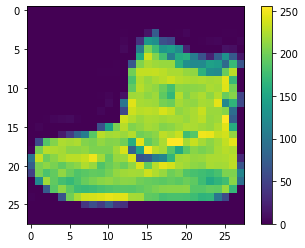

In [38]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# pre processing

as weights and bias are set to 0-1 initially in the layers, its efficient to keep our data and output in that range as well

In [39]:
train_images = train_images / 255.0

test_images = test_images / 255.0

# building model

In [42]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1) 
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2) 
    keras.layers.Dense(10, activation='softmax') # output layer (3) 
])

model.compile(optimizer='adam',           
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Layer 1:** This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

**Layer 2:** This is our first and only hidden layer. The *dense* denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

**Layer 3:** This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. The activation function *softmax* is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.

*adam* is an optimizer that applies gradient descent for us

# train the model

with keras, we dont need to create a `tf.data.dataset` object, when we hit tab in `.fit()` we see that data can be passed as numpy arrays (used here) or a 100 other forms.

In [43]:
model.fit(train_images, train_labels, epochs= 10)  # we pass the data, labels and epochs

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.5007 - accuracy: 0.8251
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3777 - accuracy: 0.8628
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3377 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3141 - accuracy: 0.8841
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2961 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2800 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2677 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2574 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2480 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

# testing the model

this can again be done using `model.evaluate()`

The verbose argument is defined from the keras documentation as: "verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar."

In [44]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3325 - accuracy: 0.8829
Test accuracy: 0.8828999996185303


# making a prediction

In [46]:
predictions = model.predict(test_images)

If we wan't to get the value with the highest score we can use a useful function from numpy called argmax(). This simply returns the index of the maximium value from a numpy array.

Ankle boot


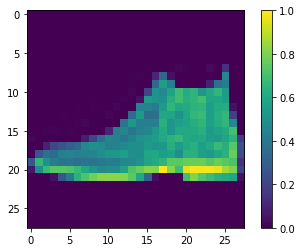

In [51]:
print(class_names[np.argmax(predictions[0])])
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number: 5


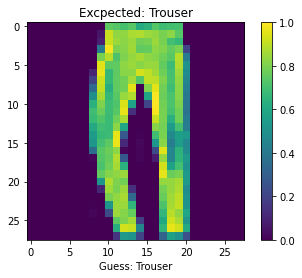

In [55]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)